# Exemple simple de regression linéaire

## 1. Importation des librairies

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from time import time

import warnings
#warnings.filterwarnings('ignore')

## 2. Définition des données d'apprentissage

In [3]:
a = 0.1
b = -0.5
X = np.arange(0,1,0.05)
Y_gt = a*X + b
Y = Y_gt + np.random.uniform(-0.02,0.02,X.shape)

## 3. Architecture du réseau 

In [4]:
linear_model = tf.keras.models.Sequential()
#une première couche avec un neurone (couche cachée)
linear_model.add(tf.keras.layers.Dense(1, input_shape=(1,)))

## Définition des paramètres d'apprentissage
# On choisit la méthode d'optimisation
sgd = tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9)

# On compile le graphe en précisant le nom fonction de coût utlisée
linear_model.compile(sgd, loss='mean_squared_error', metrics=['mean_absolute_error'])

Metal device set to: Apple M1 Max


2022-09-26 00:16:56.730291: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-09-26 00:16:56.730434: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


## 4. Apprentissage du réseau

In [5]:
# On commence l'apprentissage à proprement parler
linear_model.fit(X, Y, batch_size=1, epochs=50, shuffle='True')

Epoch 1/50


2022-09-26 00:16:56.946866: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-09-26 00:16:57.065390: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


20/20 [==============================] - 0s 3ms/step - loss: 0.0749 - mean_absolute_error: 0.2366
Epoch 2/50
20/20 [==============================] - 0s 4ms/step - loss: 0.0643 - mean_absolute_error: 0.2171
Epoch 3/50
20/20 [==============================] - 0s 5ms/step - loss: 0.0246 - mean_absolute_error: 0.1359
Epoch 4/50
20/20 [==============================] - 0s 4ms/step - loss: 0.0104 - mean_absolute_error: 0.0832
Epoch 5/50
20/20 [==============================] - 0s 3ms/step - loss: 0.0060 - mean_absolute_error: 0.0663
Epoch 6/50
20/20 [==============================] - 0s 3ms/step - loss: 0.0040 - mean_absolute_error: 0.0489
Epoch 7/50
20/20 [==============================] - 0s 4ms/step - loss: 0.0017 - mean_absolute_error: 0.0340
Epoch 8/50
20/20 [==============================] - 0s 3ms/step - loss: 9.7081e-04 - mean_absolute_error: 0.0243
Epoch 9/50
20/20 [==============================] - 0s 3ms/step - loss: 6.2386e-04 - mean_absolute_error: 0.0198
Epoch 10/50
20/20 [===

In [6]:
# Affichage du paramètres du reseau après l'apprentissage
# Qu'observez vous ?
weights = linear_model.layers[0].get_weights()
print(weights)

[array([[0.10323995]], dtype=float32), array([-0.49790815], dtype=float32)]


## 5. Prédiction par le réseau

In [7]:
Y_pred = linear_model.predict(X)

1/1 [==============================] - 0s 54ms/step


2022-09-26 00:17:00.736631: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


## 6. Visualisation des résultats

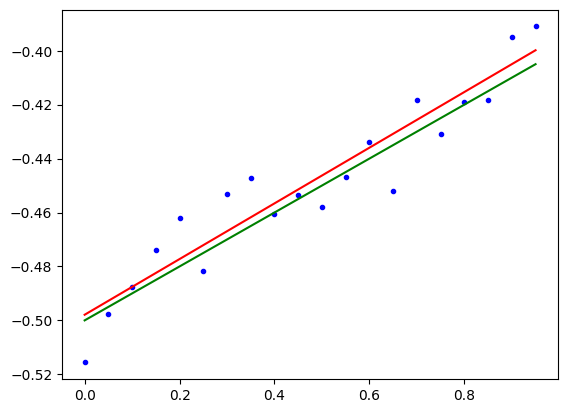

In [8]:
plt.plot(X,Y,'.b')
plt.plot(X,Y_pred,'r')
plt.plot(X,Y_gt,'g')
plt.show()

## A faire

- Observer la robustesse du modèle en faisant varier l'intensité du bruit sur les exemples
- Observer le résultat de l'apprentissage pour d'autres fonctions affines